In [ ]:
! pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

import numpy as np
import pandas as pd
from pandas import read_csv

from matplotlib import pyplot as plt


# Wine Quality
link: https://archive.ics.uci.edu/dataset/186/wine+quality

In [ ]:
wine_quality = fetch_ucirepo(id=186)

X = wine_quality.data.features
y = wine_quality.data.targets

X_red = X[:1599]
X_white = X[1599:]

y_red = y[:1599]
y_white = y[1599:]

print(X.columns)
X_red.tail(5)

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0


In [ ]:
X_white.tail(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8


In [ ]:
print(y.columns)
df = pd.DataFrame(y)
print(df.value_counts())
y.head(5)

Index(['quality'], dtype='object')
quality
6          2836
5          2138
7          1079
4           216
8           193
3            30
9             5
Name: count, dtype: int64


,quality
0,5
1,5
2,5
3,6
4,5


Text(0, 0.5, 'Frequência')

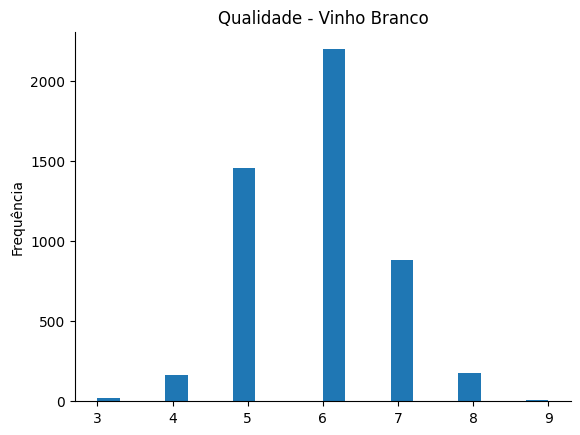

In [ ]:
y_white['quality'].plot(kind='hist', bins=20, title='Qualidade - Vinho Branco')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.ylabel('Frequência')

Text(0, 0.5, 'Frequência')

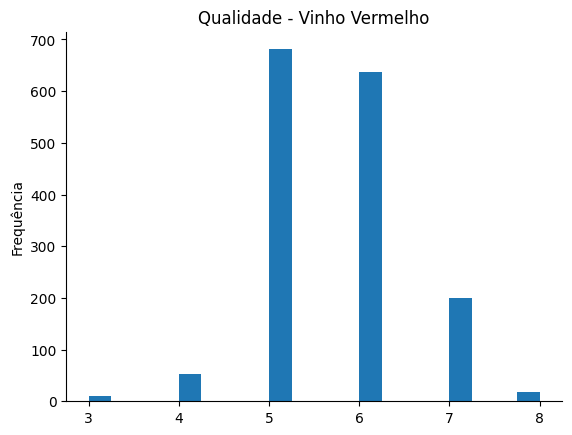

In [ ]:
y_red['quality'].plot(kind='hist', bins=20, title='Qualidade - Vinho Vermelho')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.ylabel('Frequência')

### red wine train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_red, y_red, test_size=0.3, random_state=42)

y_true = y_test

In [ ]:
model = Sequential([
   Flatten(input_shape=(11, )),
   Dense(256, activation='tanh'),
   Dense(11, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


model.summary()
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

y_pred_probs = model.predict(X_test, verbose=2)
y_pred = np.argmax(y_pred_probs, axis=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_44 (Flatten)                 │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 256)                 │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 11)                  │           2,827 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,899 (23.04 KB)

 Trainable params: 5,899 (23.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2799 - loss: 1.9438       
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5038 - loss: 1.1260 
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5112 - loss: 1.1256
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5334 - loss: 1.0629 
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5139 - loss: 1.0975
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5424 - loss: 1.0724
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5346 - loss: 1.0870
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5270 - loss: 1.0818
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5611 - loss: 1.0422
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5667 - loss: 1.0438
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5562 - loss: 1.0658
Epoch 12/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

In [ ]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("\nMétricas de avaliação:")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nRelatório completo:")
print(classification_report(y_true, y_pred, zero_division=0))


Métricas de avaliação:
Acurácia: 0.5667
Precisão: 0.5331
Recall: 0.5667
F1 Score: 0.5484

Relatório completo:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.63      0.72      0.67       195
           6       0.54      0.56      0.55       200
           7       0.41      0.34      0.38        61
           8       0.00      0.00      0.00         6

    accuracy                           0.57       480
   macro avg       0.26      0.27      0.27       480
weighted avg       0.53      0.57      0.55       480



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print("Distribuição em y_train:", {label: count for label, count in zip(*np.unique(y_train, return_counts=True))})
print("Distribuição em y_test:", {label: count for label, count in zip(*np.unique(y_test, return_counts=True))})

X_train = X_train / np.max(X_train, axis=0)
X_test = X_test / np.max(X_test, axis=0)

Distribuição em y_train: {3: 8, 4: 39, 5: 512, 6: 468, 7: 159, 8: 13}
Distribuição em y_test: {3: 2, 4: 14, 5: 169, 6: 170, 7: 40, 8: 5}


In [ ]:
predictions = model.predict(X_test)
predictions = [list(p).index(max(p)) for p in predictions]

print(predictions)
print(pd.DataFrame(predictions).value_counts())

print(y_test)
print(pd.DataFrame(y_test).value_counts())

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[5, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 7, 6, 6, 7, 6, 6, 6, 6, 6, 5, 5, 5, 6, 7, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 7, 6, 6, 5, 6, 6, 5, 5, 5, 6, 7, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 7, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 7, 6, 5, 7, 7, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 7, 6, 5, 5, 7, 6, 6, 6, 7, 5, 7, 5, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 5, 7, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 7, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 7, 6, 5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 6, 7, 6, 6, 6, 6, 6, 5, 6, 6, 6, 7, 5, 5, 6, 5, 6, 6, 5, 7, 5, 6, 5, 3, 6, 5, 6, 5, 6, 7, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 

### white wine train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_white, y_white, test_size=0.3, random_state=42)

y_true = y_test

In [ ]:
model = Sequential([
   Flatten(input_shape=(11, )),
   Dense(256, activation='tanh'),
   Dense(11, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


model.summary()
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_45 (Flatten)                 │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_92 (Dense)                     │ (None, 256)                 │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 11)                  │           2,827 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,899 (23.04 KB)

 Trainable params: 5,899 (23.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4258 - loss: 1.3467
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4665 - loss: 1.2202
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4591 - loss: 1.2098
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4603 - loss: 1.2134
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4641 - loss: 1.1836
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4800 - loss: 1.1694
Epoch 7/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4769 - loss: 1.1642
Epoch 8/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4522 - loss: 1.2044
Epoch 9/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4787 - loss: 1.1652
Epoch 10/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4676 - loss: 1.1759
Epoch 11/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4931 - loss: 1.1479
Epoch 12/100
108/108 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
y_pred_probs = model.predict(X_test, verbose=2)
y_pred = np.argmax(y_pred_probs, axis=1)

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("\nMétricas de avaliação:")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nRelatório completo:")
print(classification_report(y_true, y_pred, zero_division=0))

46/46 - 0s - 3ms/step

Métricas de avaliação:
Acurácia: 0.4707
Precisão: 0.4763
Recall: 0.4707
F1 Score: 0.4327

Relatório completo:
              precision    recall  f1-score   support

           3       0.50      0.14      0.22         7
           4       0.38      0.07      0.12        40
           5       0.44      0.89      0.59       426
           6       0.55      0.34      0.42       668
           7       0.45      0.28      0.34       280
           8       0.00      0.00      0.00        49

    accuracy                           0.47      1470
   macro avg       0.39      0.29      0.28      1470
weighted avg       0.48      0.47      0.43      1470



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Car Evaluation
link: https://archive.ics.uci.edu/dataset/19/car+evaluation

In [ ]:
car_evaluation = fetch_ucirepo(id=19)

X = car_evaluation.data.features
y = car_evaluation.data.targets

print(X.columns)
X.head(5)

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')


,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [ ]:
print(y.columns)
df = pd.DataFrame(y)
print(df.value_counts())
y.head(5)

Index(['class'], dtype='object')
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc


In [ ]:
X_enconded = pd.get_dummies(pd.DataFrame(X), columns=X.columns, drop_first=True)
y_enconded = pd.get_dummies(pd.DataFrame(y), columns=y.columns, drop_first=False)

print(X_enconded.columns)
print(y_enconded.columns)

Index(['buying_low', 'buying_med', 'buying_vhigh', 'maint_low', 'maint_med',
       'maint_vhigh', 'doors_3', 'doors_4', 'doors_5more', 'persons_4',
       'persons_more', 'lug_boot_med', 'lug_boot_small', 'safety_low',
       'safety_med'],
      dtype='object')
Index(['class_acc', 'class_good', 'class_unacc', 'class_vgood'], dtype='object')


In [ ]:
y_test

,class_acc,class_good,class_unacc,class_vgood
1318,False,False,True,False
124,False,False,True,False
648,False,False,True,False
249,False,False,True,False
1599,False,False,True,False
...,...,...,...,...
960,False,False,True,False
814,False,False,True,False
752,True,False,False,False
744,False,False,True,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_enconded, y_enconded, test_size=0.3, random_state = 42)

y_true = np.argmax(y_test.values, axis=1)

In [ ]:
model = tf.keras.Sequential([
    Flatten(input_shape=(15, )),
    Dense(1024, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

model.summary()
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
model.evaluate(X_test, y_test, verbose=2)

y_pred_probs = model.predict(X_test, verbose=2)
y_pred = np.argmax(model.predict(X_test), axis=1)

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("\nMétricas de avaliação:")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nRelatório completo:")
print(classification_report(y_true, y_pred, zero_division=0))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_35 (Flatten)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 1024)                │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 4)                   │           4,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,484 (80.02 KB)

 Trainable params: 20,484 (80.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6625 - loss: 0.9972
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7854 - loss: 0.6216
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8413 - loss: 0.4472
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8641 - loss: 0.3455
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9014 - loss: 0.2823
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9265 - loss: 0.2333
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9377 - loss: 0.2059
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9586 - loss: 0.1737
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9558 - loss: 0.1530
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9576 - loss: 0.1484
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9792 - loss: 0.1126
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

# Poker Hand
link: https://archive.ics.uci.edu/dataset/158/poker+hand

In [ ]:
poker_hand = fetch_ucirepo(id=158)

X = poker_hand.data.features
y = poker_hand.data.targets

print(X.columns)
X.head(5)

Index(['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5'], dtype='object')


,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,1,10,1,11,1,13,1,12,1,1
1,2,11,2,13,2,10,2,12,2,1
2,3,12,3,11,3,13,3,10,3,1
3,4,10,4,11,4,1,4,13,4,12
4,4,1,4,13,4,12,4,11,4,10


In [ ]:
print(y.columns)
df = pd.DataFrame(y)
print(df.value_counts())
y.head(5)

Index(['CLASS'], dtype='object')
CLASS
0        513702
1        433097
2         48828
3         21634
4          3978
5          2050
6          1460
7           236
8            17
9             8
Name: count, dtype: int64


,CLASS
0,9
1,9
2,9
3,9
4,9


Text(0, 0.5, 'Frequência')

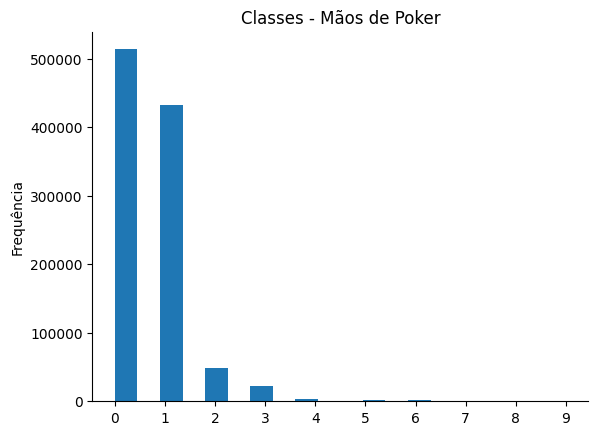

In [13]:
y['CLASS'].plot(kind='hist', bins=20, title='Classes - Mãos de Poker')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xticks(range(10))
plt.ylabel('Frequência')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

y_true = y_test

In [14]:
early_stopping = EarlyStopping(
    monitor='loss',
    patience=10,
    restore_best_weights=True
)

model = tf.keras.Sequential([
    Flatten(input_shape=(10, )),
    Dense(32, activation='relu'),
    Dense(10, activation='sigmoid')
])

model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

model.summary()
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping])
model.evaluate(X_test, y_test, verbose=2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 682 (2.66 KB)

 Trainable params: 682 (2.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
22423/22423 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.5284 - loss: 0.9914
Epoch 2/100
22423/22423 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.5818 - loss: 0.9085
Epoch 3/100
22423/22423 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.6045 - loss: 0.8764
Epoch 4/100
22423/22423 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.6223 - loss: 0.8503
Epoch 5/100
22423/22423 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.6335 - loss: 0.8301
Epoch 6/100
22423/22423 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.6417 - loss: 0.8162
Epoch 7/100
22423/22423 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.6482 - loss: 0.8040
Epoch 8/100
22423/22423 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.6547 - loss: 0.7956
Epoch 9/100
22423/22423 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.6592 - loss: 0.7877
Epoch 10/100
22423/22423 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.6677 - loss: 0.7732
Epoch 11/100
22423/22423 ━━━━━━━━━━━━━━━━━━━━ 78s 2ms/step - accuracy: 0.6779 -

[0.647309422492981, 0.7406432032585144]

In [16]:
y_pred_probs = model.predict(X_test, verbose=2)
y_pred = np.argmax(model.predict(X_test), axis=1)

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("\nMétricas de avaliação:")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nRelatório completo:")
print(classification_report(y_true, y_pred, zero_division=0))

9610/9610 - 25s - 3ms/step
9610/9610 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step

Métricas de avaliação:
Acurácia: 0.7373
Precisão: 0.7324
Recall: 0.7373
F1 Score: 0.7112

Relatório completo:
              precision    recall  f1-score   support

           0       0.72      0.97      0.83    153717
           1       0.80      0.56      0.66    130369
           2       0.43      0.12      0.18     14545
           3       0.56      0.35      0.43      6524
           4       0.00      0.00      0.00      1203
           5       0.00      0.00      0.00       611
           6       0.15      0.02      0.04       446
           7       0.73      0.27      0.40        81
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         3

    accuracy                           0.74    307503
   macro avg       0.34      0.23      0.25    307503
weighted avg       0.73      0.74      0.71    307503

